# Import packages

In [99]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.stattools import durbin_watson
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import networkx as nx

params = {'axes.titlesize':32, 'xtick.labelsize':24, 'ytick.labelsize':24, 'axes.labelsize': 32, 'axes.titlesize': 32}
matplotlib.rcParams.update(params)

# 第一題：Linear Regression Analysis for Wine Quality

## Read data

In [100]:
df = pd.read_csv("MDS_Assignment1_furnace.csv")
X = df.drop(["grade"], axis=1)
y = df["grade"]
X.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27
0,1.848564,-0.26425,-0.461423,0.409400,1.305455,2.329398,0.370965,0.090167,0.107958,0.0,0.395874,0.308879,0.548623,0.472101,0.172917,0.098853,0.308879,0.040193,0.182574,0.085505,0.233285,-1.080663,0.443257,-0.406121,-0.687687,0.271886,3.727218,0.102129
1,-0.825098,-0.26425,3.032397,-2.442599,1.305455,-0.276144,0.370965,0.090167,0.107958,0.0,0.395874,0.308879,0.548623,0.472101,0.172917,0.098853,0.308879,0.040193,0.182574,0.085505,0.233285,-1.080663,-0.232546,-0.406366,-0.687687,0.271886,-0.232472,0.102129
2,1.848564,-0.26425,-0.461423,0.409400,1.305455,2.329398,0.370965,0.090167,0.107958,0.0,0.395874,0.308879,0.548623,0.472101,0.172917,0.098853,0.308879,0.040193,0.182574,0.085505,0.233285,0.925358,1.459782,1.221876,1.877777,0.271886,-0.232472,0.102129
3,0.511733,-0.26425,-0.461423,0.409400,-0.525726,-0.276144,0.370965,0.090167,0.107958,0.0,0.395874,0.308879,-1.999287,-2.118189,0.172917,0.098853,-3.237512,0.040193,0.182574,0.085505,0.233285,0.925358,-0.008030,-0.406366,1.504523,0.271886,-0.232472,0.102129
4,-0.825098,-0.26425,-0.461423,0.409400,-0.525726,-0.276144,0.370965,0.090167,0.107958,0.0,-2.526055,0.308879,-1.999287,-2.118189,0.172917,0.098853,0.308879,0.040193,0.182574,0.085505,0.233285,0.925358,-0.573268,-1.164793,1.877777,0.271886,-0.232472,0.102129


## Part (a), (b), (c)

In [101]:
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     21.52
Date:                Wed, 20 Oct 2021   Prob (F-statistic):           1.16e-70
Time:                        13:40:16   Log-Likelihood:                -381.52
No. Observations:                 620   AIC:                             819.0
Df Residuals:                     592   BIC:                             943.1
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0339      0.018    110.528      0.000       1.998       2.070
f0            -0.0055      0.025     -0.224      0.823      -0.054       0.043
f1             0.0440      0.028      1.571      0.117      -0.011       0.099
f2             0.3140      0.035      9.028      0.000       0.246       0.382
f3             0.0186      0.042      0.447      0.655      -0.063       0.100
f4            -0.0035      0.038     -0.091      0.928      -0.078       0.072
f5            -0.0740      0.030     -2.483      0.013      -0.133      -0.015
f6            -0.0710      0.026     -2.742      0.006      -0.122      -0.020
f7             0.0235      0.028      0.853      0.394      -0.031       0.078
f8             0.0410      0.019      2.170      0.030       0.004       0.078
f9          4.957e-17   1.24e-17      4.013      0.000    2.53e-17    7.38e-17
f10           -0.0446      0.021     -2.119      0.035      -0.086      -0.003
f11           -0.0292      0.020     -1.438      0.151      -0.069       0.011
f12           -0.0006      0.022     -0.027      0.979      -0.044       0.043
f13            0.0336      0.024      1.412      0.159      -0.013       0.080
f14           -0.1832      0.021     -8.898      0.000      -0.224      -0.143
f15           -0.1061      0.019     -5.565      0.000      -0.144      -0.069
f16           -0.0358      0.020     -1.756      0.080      -0.076       0.004
f17            0.0633      0.019      3.409      0.001       0.027       0.100
f18           -0.1904      0.021     -9.194      0.000      -0.231      -0.150
f19            0.0278      0.026      1.051      0.294      -0.024       0.080
f20            0.0126      0.020      0.644      0.520      -0.026       0.051
f21           -0.0357      0.028     -1.263      0.207      -0.091       0.020
f22            0.0747      0.021      3.533      0.000       0.033       0.116
f23           -0.0088      0.020     -0.442      0.659      -0.048       0.030
f24            0.0193      0.024      0.800      0.424      -0.028       0.067
f25           -0.0679      0.020     -3.406      0.001      -0.107      -0.029
f26           -0.0360      0.022     -1.625      0.105      -0.080       0.008
f27           -0.0062      0.019     -0.324      0.746      -0.044       0.031
==============================================================================
Omnibus:                       39.669   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.525
Skew:                           0.090   Prob(JB):                     9.23e-33
Kurtosis:                       5.383   Cond. No.                     2.25e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is

## Part (d)

In [103]:
shapiro_test = stats.shapiro(est.resid)
shapiro_test

(0.9345124363899231, 7.536043131996446e-16)

In [104]:
durbin_watson(est.resid)

2.0040534804722108

In [105]:
name = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(est.resid, est.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 140.62034965182622),
 ('p-value', 5.87184293010559e-17),
 ('f-value', 6.431710999631279),
 ('f p-value', 5.311815675353319e-20)]

# 第二題：Data Preprocessing and Generalized Linear Model (GLM)/Logistic Regression

## Read data

In [106]:
df = pd.read_csv("MDS_Assignment1_census.csv", header=None)
df = df.replace(' ?', np.nan)
df.head(30)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


## Part (1)

In [107]:
df.describe()

,0,2,4,10,11,12
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [108]:
df.isnull().sum()

0        0
1     1836
2        0
3        0
4        0
5        0
6     1843
7        0
8        0
9        0
10       0
11       0
12       0
13     583
14       0
dtype: int64

In [109]:
df.nunique()

0        73
1         8
2     21648
3        16
4        16
5         7
6        14
7         6
8         5
9         2
10      119
11       92
12       94
13       41
14        2
dtype: int64

In [111]:
df.corr()

,0,2,4,10,11,12
0,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
2,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
4,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
10,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
11,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
12,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


In [113]:
df.var()

0     1.860614e+02
2     1.114080e+10
4     6.618890e+00
10    5.454254e+07
11    1.623769e+05
12    1.524590e+02
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f21cd7e9090>,
      dtype=object)

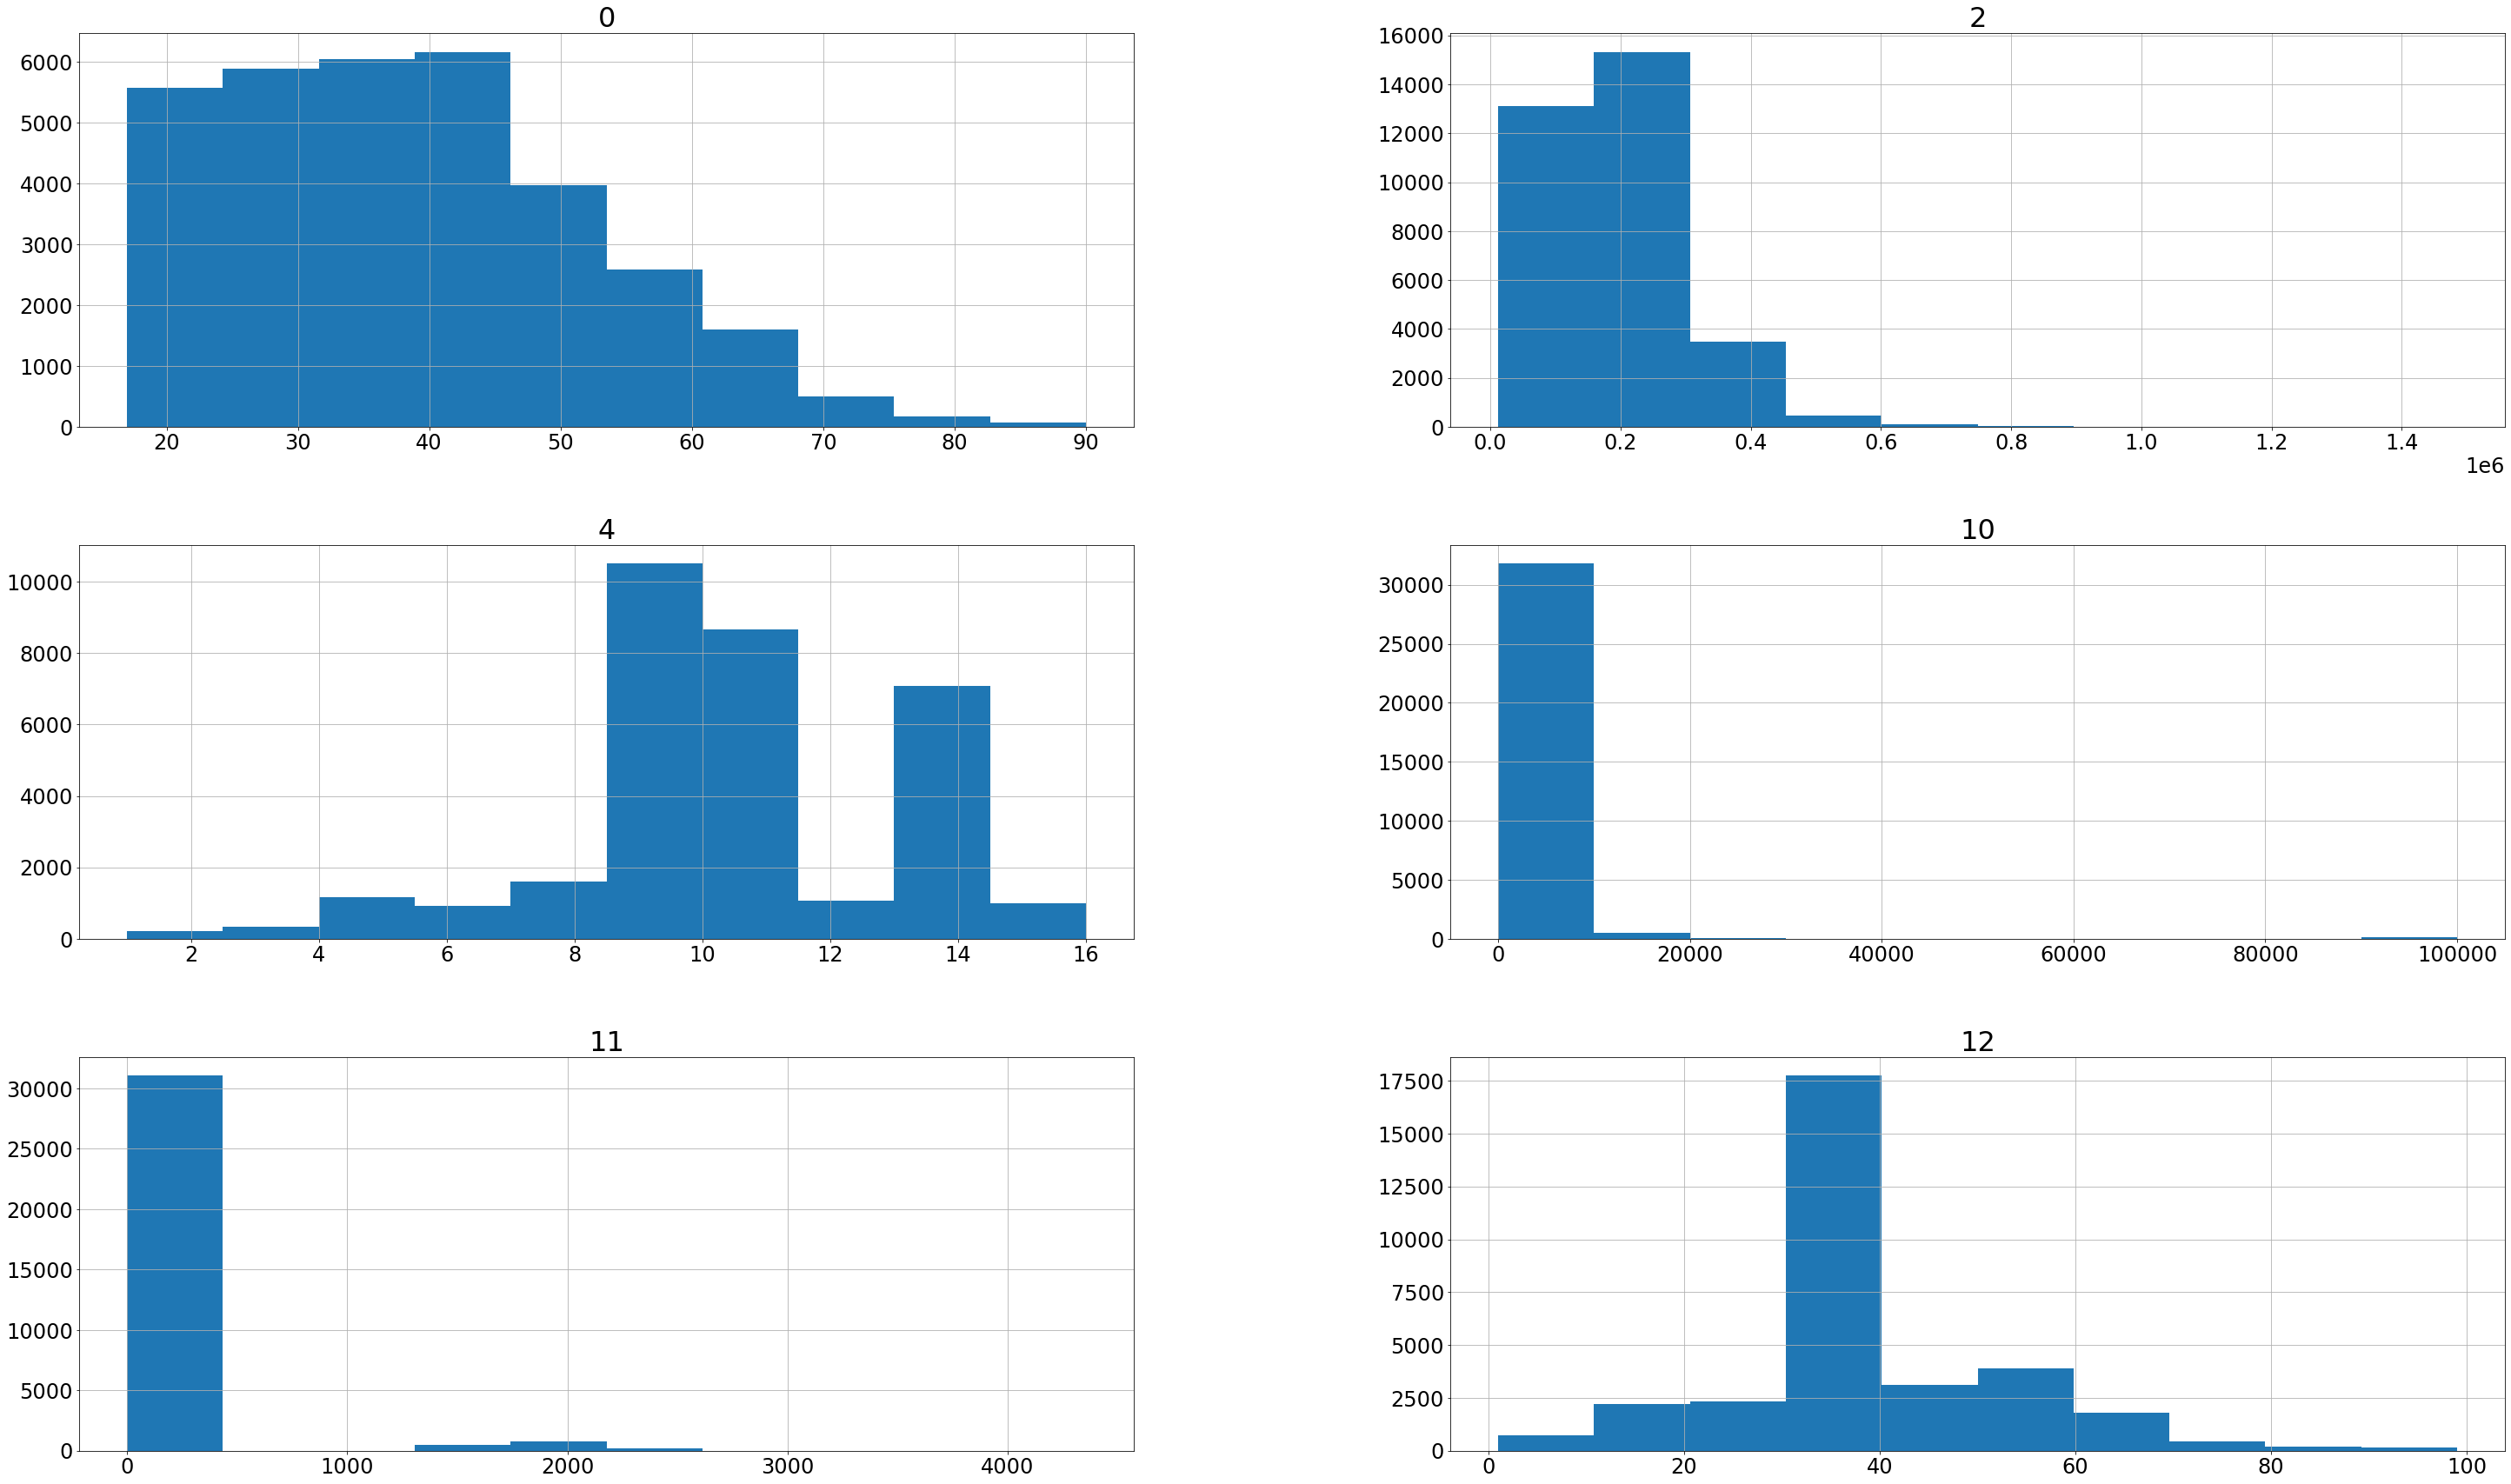

In [115]:
df.hist(figsize=(50, 30))

## Part (2)

In [116]:
X = df.drop([1, 3, 5, 6, 7, 8, 9, 13, 14], axis=1)
ss = StandardScaler()
scaled_df = ss.fit_transform(X)
scaled_df = pd.DataFrame(scaled_df, columns = X.columns)
abs_scaled_df = (abs(scaled_df)>3)
all_abs_scaled = abs_scaled_df.any(axis=1)
outlier_index = all_abs_scaled[all_abs_scaled==True]
outlier_index.index

Int64Index([   10,    23,    28,    32,    37,    40,    52,    77,    93,
               96,
            ...
            32445, 32458, 32459, 32469, 32476, 32494, 32511, 32518, 32525,
            32531],
           dtype='int64', length=2733)

In [117]:
print(f'# of outliers: {len(outlier_index.index)}')

# of outliers: 2733


In [125]:
df = df.replace(np.nan, 'None')
le = [LabelEncoder() for i in range(9)]
for id, i in enumerate([1, 3, 5, 6, 7, 8, 9, 13, 14]):
    df[i] = le[id].fit_transform(df[i])
    if 'None' in le[id].classes_:
        df[i] = df[i].replace(list(le[id].classes_).index('None'), np.nan)

imp = IterativeImputer(max_iter=100, random_state=0)
imp.fit(df)

IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=100, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=None, random_state=0,
                 sample_posterior=False, skip_complete=False, tol=0.001,
                 verbose=0)

In [126]:
df_fmice = imp.transform(df)
df_fmice = pd.DataFrame(df_fmice, columns=df.columns, dtype=int)
df_fmice.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [127]:
for id, i in enumerate([1, 3, 5, 6, 7, 8, 9, 13, 14]):
    df_fmice[i] = le[id].inverse_transform(df_fmice[i])
df_fmice.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [47]:
df_fmice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       32561 non-null  int64 
 1   1       32561 non-null  object
 2   2       32561 non-null  int64 
 3   3       32561 non-null  object
 4   4       32561 non-null  int64 
 5   5       32561 non-null  object
 6   6       32561 non-null  object
 7   7       32561 non-null  object
 8   8       32561 non-null  object
 9   9       32561 non-null  object
 10  10      32561 non-null  int64 
 11  11      32561 non-null  int64 
 12  12      32561 non-null  int64 
 13  13      32561 non-null  object
 14  14      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Part (3)

In [48]:
df_with_dummies = pd.get_dummies(df_fmice, drop_first=True)
df_with_dummies.head()

,0,2,4,10,11,12,1_ Local-gov,1_ Never-worked,1_ Private,1_ Self-emp-inc,1_ Self-emp-not-inc,1_ State-gov,1_ Without-pay,3_ 11th,3_ 12th,3_ 1st-4th,3_ 5th-6th,3_ 7th-8th,3_ 9th,3_ Assoc-acdm,3_ Assoc-voc,3_ Bachelors,3_ Doctorate,3_ HS-grad,3_ Masters,3_ Preschool,3_ Prof-school,3_ Some-college,5_ Married-AF-spouse,5_ Married-civ-spouse,5_ Married-spouse-absent,5_ Never-married,5_ Separated,5_ Widowed,6_ Armed-Forces,6_ Craft-repair,6_ Exec-managerial,6_ Farming-fishing,6_ Handlers-cleaners,6_ Machine-op-inspct,...,13_ China,13_ Columbia,13_ Cuba,13_ Dominican-Republic,13_ Ecuador,13_ El-Salvador,13_ England,13_ France,13_ Germany,13_ Greece,13_ Guatemala,13_ Haiti,13_ Holand-Netherlands,13_ Honduras,13_ Hong,13_ Hungary,13_ India,13_ Iran,13_ Ireland,13_ Italy,13_ Jamaica,13_ Japan,13_ Laos,13_ Mexico,13_ Nicaragua,13_ Outlying-US(Guam-USVI-etc),13_ Peru,13_ Philippines,13_ Poland,13_ Portugal,13_ Puerto-Rico,13_ Scotland,13_ South,13_ Taiwan,13_ Thailand,13_ Trinadad&Tobago,13_ United-States,13_ Vietnam,13_ Yugoslavia,14_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Part (4)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(df_with_dummies.drop(['14_ >50K'], axis=1), df_with_dummies['14_ >50K'], test_size=0.2, random_state=87)
X_train.head()

,0,2,4,10,11,12,1_ Local-gov,1_ Never-worked,1_ Private,1_ Self-emp-inc,1_ Self-emp-not-inc,1_ State-gov,1_ Without-pay,3_ 11th,3_ 12th,3_ 1st-4th,3_ 5th-6th,3_ 7th-8th,3_ 9th,3_ Assoc-acdm,3_ Assoc-voc,3_ Bachelors,3_ Doctorate,3_ HS-grad,3_ Masters,3_ Preschool,3_ Prof-school,3_ Some-college,5_ Married-AF-spouse,5_ Married-civ-spouse,5_ Married-spouse-absent,5_ Never-married,5_ Separated,5_ Widowed,6_ Armed-Forces,6_ Craft-repair,6_ Exec-managerial,6_ Farming-fishing,6_ Handlers-cleaners,6_ Machine-op-inspct,...,13_ Canada,13_ China,13_ Columbia,13_ Cuba,13_ Dominican-Republic,13_ Ecuador,13_ El-Salvador,13_ England,13_ France,13_ Germany,13_ Greece,13_ Guatemala,13_ Haiti,13_ Holand-Netherlands,13_ Honduras,13_ Hong,13_ Hungary,13_ India,13_ Iran,13_ Ireland,13_ Italy,13_ Jamaica,13_ Japan,13_ Laos,13_ Mexico,13_ Nicaragua,13_ Outlying-US(Guam-USVI-etc),13_ Peru,13_ Philippines,13_ Poland,13_ Portugal,13_ Puerto-Rico,13_ Scotland,13_ South,13_ Taiwan,13_ Thailand,13_ Trinadad&Tobago,13_ United-States,13_ Vietnam,13_ Yugoslavia
8315,25,191921,10,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
11913,37,167415,9,0,0,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
14682,26,276075,10,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1151,40,520586,10,0,0,39,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
20681,55,252714,11,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [50]:
X_test.head()

,0,2,4,10,11,12,1_ Local-gov,1_ Never-worked,1_ Private,1_ Self-emp-inc,1_ Self-emp-not-inc,1_ State-gov,1_ Without-pay,3_ 11th,3_ 12th,3_ 1st-4th,3_ 5th-6th,3_ 7th-8th,3_ 9th,3_ Assoc-acdm,3_ Assoc-voc,3_ Bachelors,3_ Doctorate,3_ HS-grad,3_ Masters,3_ Preschool,3_ Prof-school,3_ Some-college,5_ Married-AF-spouse,5_ Married-civ-spouse,5_ Married-spouse-absent,5_ Never-married,5_ Separated,5_ Widowed,6_ Armed-Forces,6_ Craft-repair,6_ Exec-managerial,6_ Farming-fishing,6_ Handlers-cleaners,6_ Machine-op-inspct,...,13_ Canada,13_ China,13_ Columbia,13_ Cuba,13_ Dominican-Republic,13_ Ecuador,13_ El-Salvador,13_ England,13_ France,13_ Germany,13_ Greece,13_ Guatemala,13_ Haiti,13_ Holand-Netherlands,13_ Honduras,13_ Hong,13_ Hungary,13_ India,13_ Iran,13_ Ireland,13_ Italy,13_ Jamaica,13_ Japan,13_ Laos,13_ Mexico,13_ Nicaragua,13_ Outlying-US(Guam-USVI-etc),13_ Peru,13_ Philippines,13_ Poland,13_ Portugal,13_ Puerto-Rico,13_ Scotland,13_ South,13_ Taiwan,13_ Thailand,13_ Trinadad&Tobago,13_ United-States,13_ Vietnam,13_ Yugoslavia
9780,49,105586,11,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8330,53,20438,10,0,0,15,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
179,33,37274,13,0,0,65,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
19554,30,323069,13,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
24068,30,345705,10,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [128]:
y_train.head()

8315     0
11913    0
14682    0
1151     0
20681    0
Name: 14_ >50K, dtype: uint8

In [52]:
y_test.head()

9780     1
8330     0
179      0
19554    0
24068    0
Name: 14_ >50K, dtype: uint8

## Part (5)

In [ ]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
model = sm.GLM(y_train, X_train, family=sm.families.Binomial()).fit()

In [54]:
model.predict(X_test).head(10)

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


9780     1.0
8330     0.0
179      1.0
19554    0.0
24068    1.0
10241    1.0
3470     1.0
7144     0.0
11917    0.0
19087    0.0
dtype: float64

# 第三題：Association Rule- Market Basket Analysis

## Read data

In [134]:
df = pd.read_csv("MDS_Assignment1_groceries.csv", header=None, sep='delimiter')
df = df[0].str.split(',', expand=True)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,tropical fruit,yogurt,coffee,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,whole milk,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,pip fruit,yogurt,cream cheese,meat spreads,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,other vegetables,whole milk,condensed milk,long life bakery product,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


## Part (1)

In [136]:
categories = set()
for i in df:
    categories |= set(df[i].unique())
categories -= {None}
categories

{'Instant food products',
 'UHT-milk',
 'abrasive cleaner',
 'artif. sweetener',
 'baby cosmetics',
 'baby food',
 'bags',
 'baking powder',
 'bathroom cleaner',
 'beef',
 'berries',
 'beverages',
 'bottled beer',
 'bottled water',
 'brandy',
 'brown bread',
 'butter',
 'butter milk',
 'cake bar',
 'candles',
 'candy',
 'canned beer',
 'canned fish',
 'canned fruit',
 'canned vegetables',
 'cat food',
 'cereals',
 'chewing gum',
 'chicken',
 'chocolate',
 'chocolate marshmallow',
 'citrus fruit',
 'cleaner',
 'cling film/bags',
 'cocoa drinks',
 'coffee',
 'condensed milk',
 'cooking chocolate',
 'cookware',
 'cream',
 'cream cheese',
 'cream cheese ',
 'curd',
 'curd cheese',
 'decalcifier',
 'dental care',
 'dessert',
 'detergent',
 'dish cleaner',
 'dishes',
 'dog food',
 'domestic eggs',
 'female sanitary products',
 'finished products',
 'fish',
 'flour',
 'flower (seeds)',
 'flower soil/fertilizer',
 'frankfurter',
 'frozen chicken',
 'frozen dessert',
 'frozen fish',
 'frozen fr

In [137]:
data = {}
for category in categories:
    data[category] = []
for id, row in df.iterrows():
    intersection = set(row) - {None}
    difference = categories - intersection - {None}
    for i in intersection:
        data[i].append(1)
    for i in difference:
        data[i].append(0)
df_one_hot = pd.DataFrame(data)
df_one_hot.head()

,liquor (appetizer),newspapers,photo/film,make up remover,pot plants,honey,packaged fruit/vegetables,pickled vegetables,white wine,specialty cheese,cookware,spread cheese,nut snack,preservation products,meat spreads,skin care,liquor,dessert,liver loaf,pet care,vinegar,light bulbs,decalcifier,kitchen towels,frozen fruits,flower (seeds),margarine,dish cleaner,brown bread,turkey,sugar,candles,grapes,roll products,snack products,canned beer,seasonal products,frozen potato products,sliced cheese,butter,...,ice cream,pork,sparkling wine,spices,baby food,chicken,chocolate,soups,kitchen utensil,potato products,cereals,frozen fish,instant coffee,citrus fruit,abrasive cleaner,baking powder,sound storage medium,canned vegetables,whipped/sour cream,processed cheese,domestic eggs,rice,waffles,candy,salty snack,butter milk,hair spray,whole milk,pudding powder,dishes,bottled beer,softener,curd cheese,flour,canned fruit,hard cheese,bathroom cleaner,frozen chicken,brandy,frozen meals
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


## Part (2)

In [138]:
freq_item = apriori(df_one_hot, min_support=0.001, use_colnames=True).sort_values(by=['support'], ascending=False)
freq_item.head()

,support,itemsets
147,0.255516,(whole milk)
62,0.193493,(other vegetables)
76,0.183935,(rolls/buns)
113,0.174377,(soda)
110,0.139502,(yogurt)


In [140]:
rules = association_rules(freq_item, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
1,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
2,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,0.009636,1.048452
3,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696
4,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132


In [141]:
int_rules = rules[(rules["support"] >= 0.001) & (rules["confidence"] >= 0.15)].sort_values(by=["lift"], ascending=False)
top5_rules = int_rules.head().copy()
top5_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
21629,(liquor),"(bottled beer, red/blush wine)",0.011083,0.004881,0.001932,0.174312,35.715787,0.001878,1.205200
21624,"(bottled beer, red/blush wine)",(liquor),0.004881,0.011083,0.001932,0.395833,35.715787,0.001878,1.636828
81586,"(oil, tropical fruit, whole milk)","(yogurt, other vegetables, root vegetables)",0.002542,0.012913,0.001017,0.400000,30.976378,0.000984,1.645145
81588,"(yogurt, root vegetables, oil)","(other vegetables, tropical fruit, whole milk)",0.001932,0.017082,0.001017,0.526316,30.811404,0.000984,2.075049
81477,"(yogurt, other vegetables, domestic eggs, whol...","(tropical fruit, butter)",0.003355,0.009964,0.001017,0.303030,30.411255,0.000983,1.420486


## Part (4)

Text(0, 0.5, 'confidence')

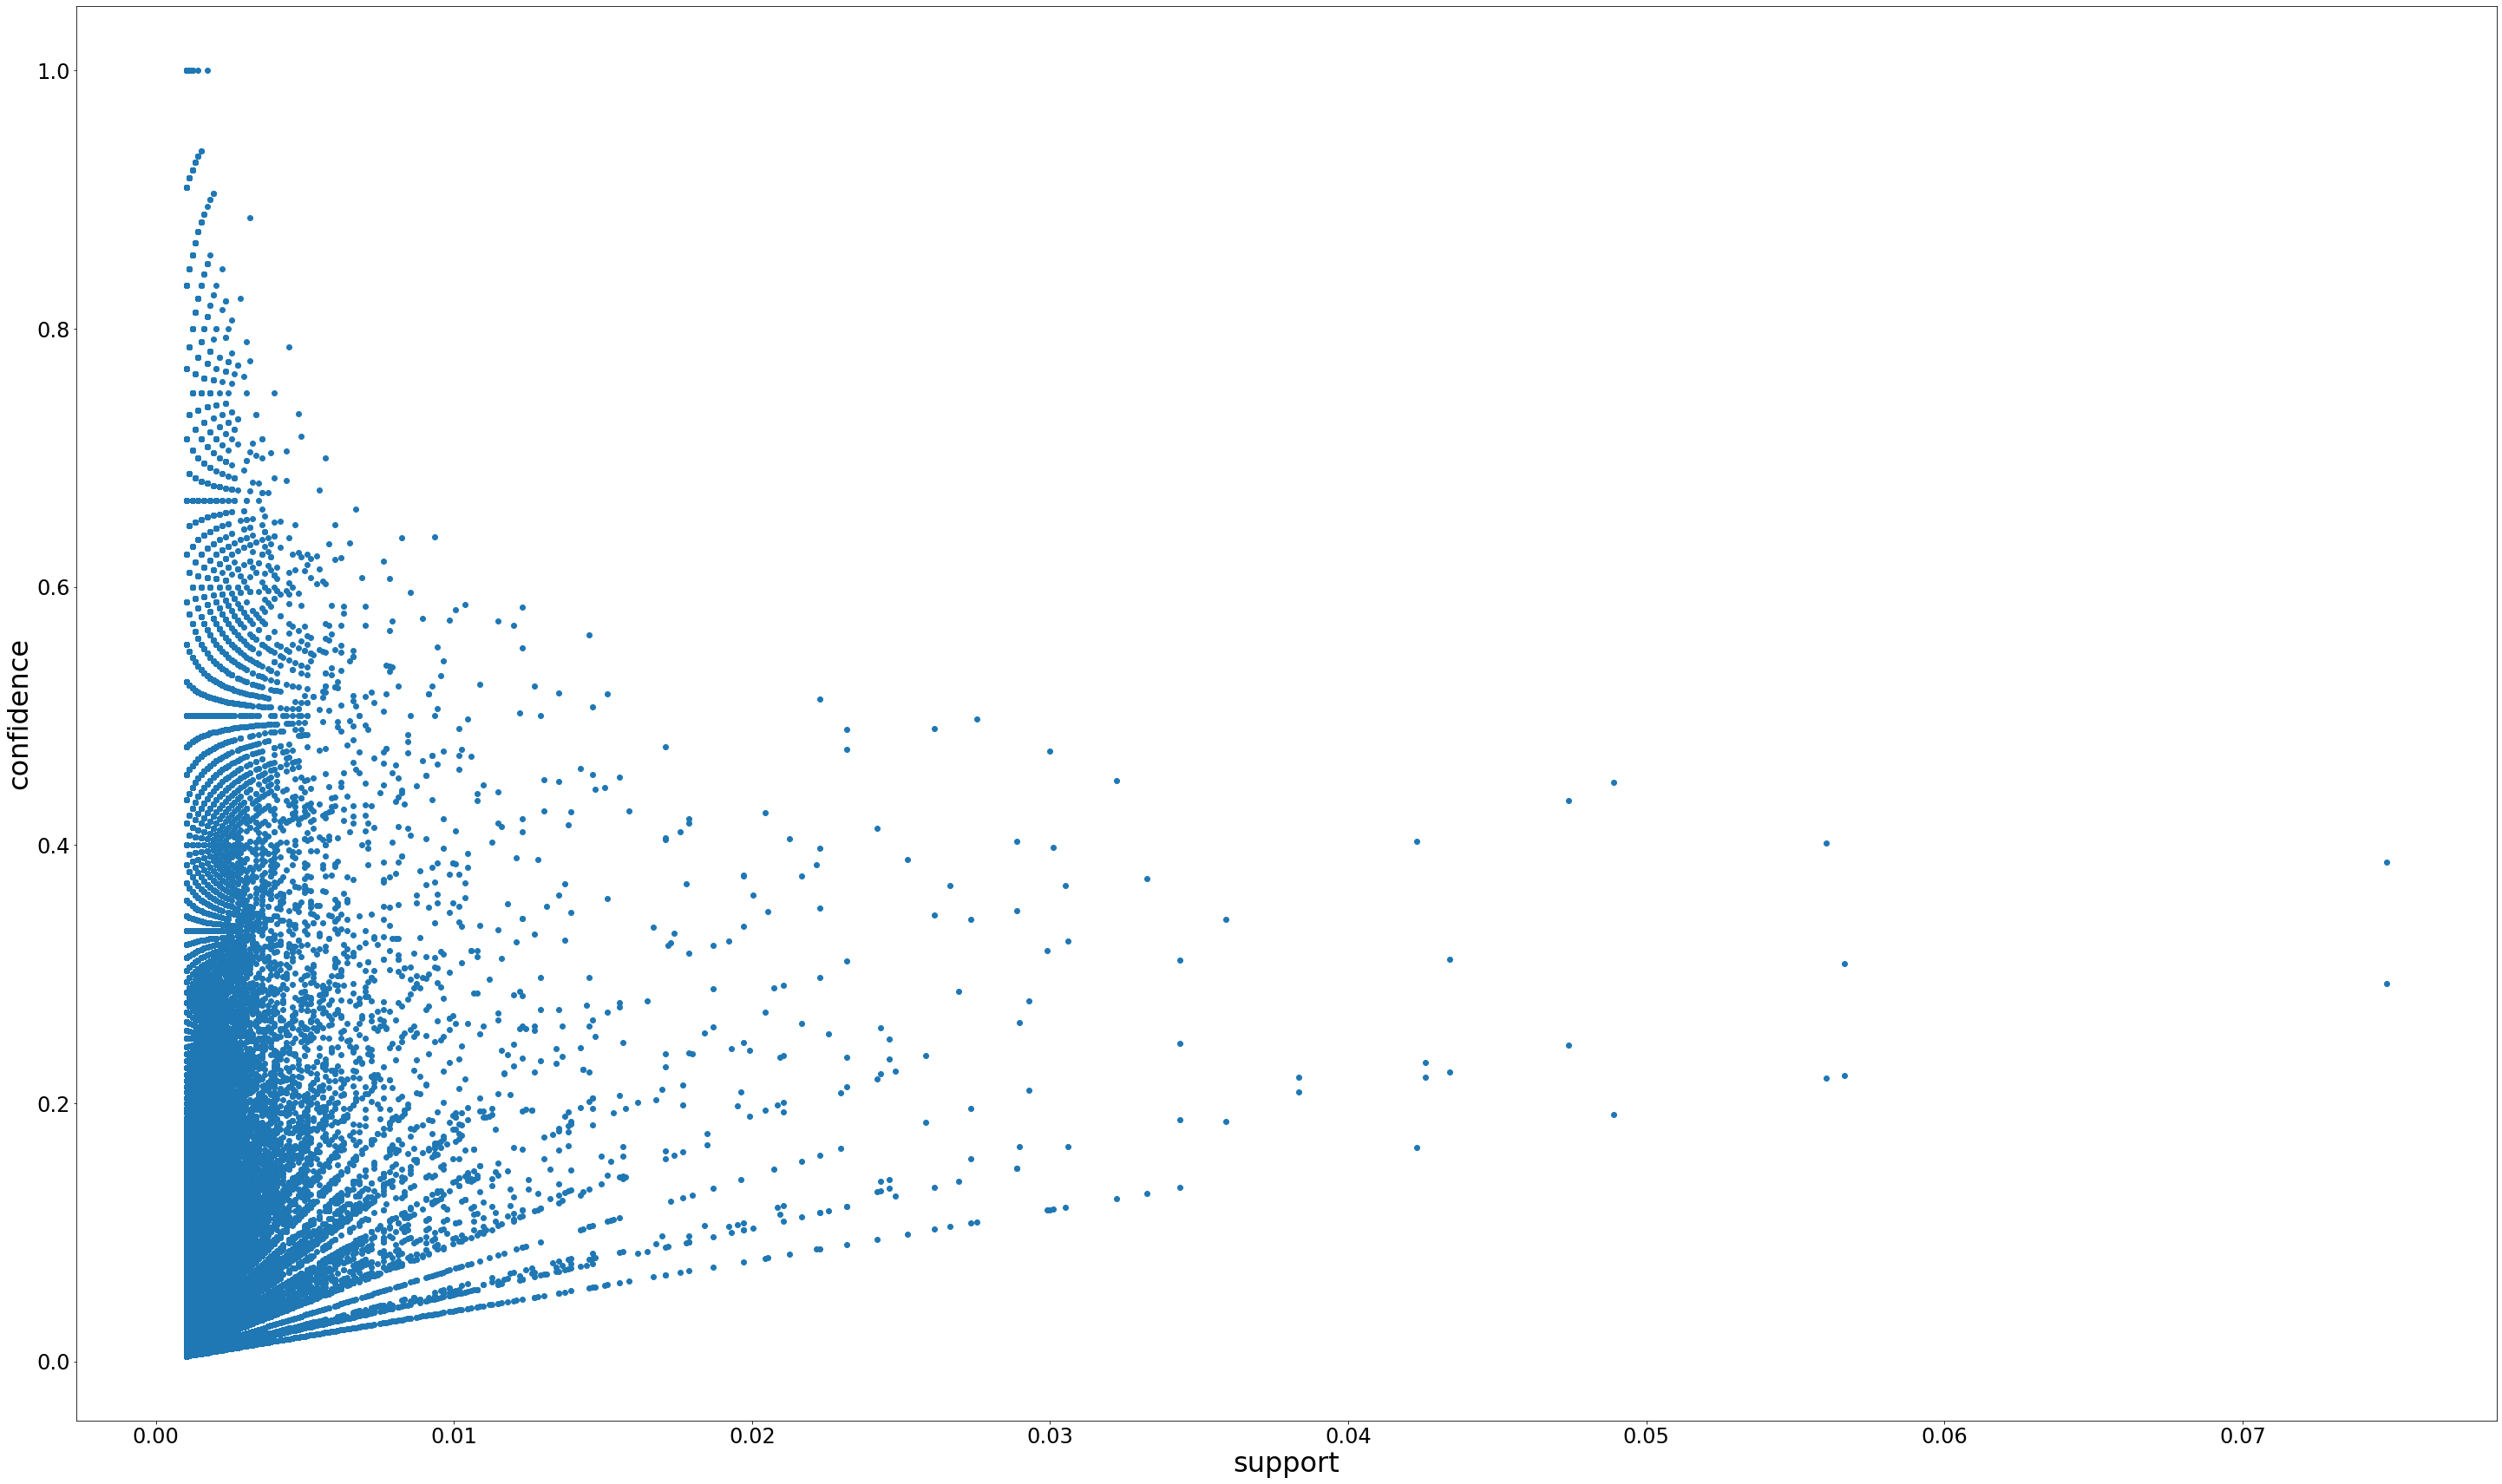

In [87]:
plt.figure(figsize=(50, 30))
plt.scatter(rules["support"],rules["confidence"])
plt.xlabel("support")
plt.ylabel("confidence")

Text(0, 0.5, 'lift')

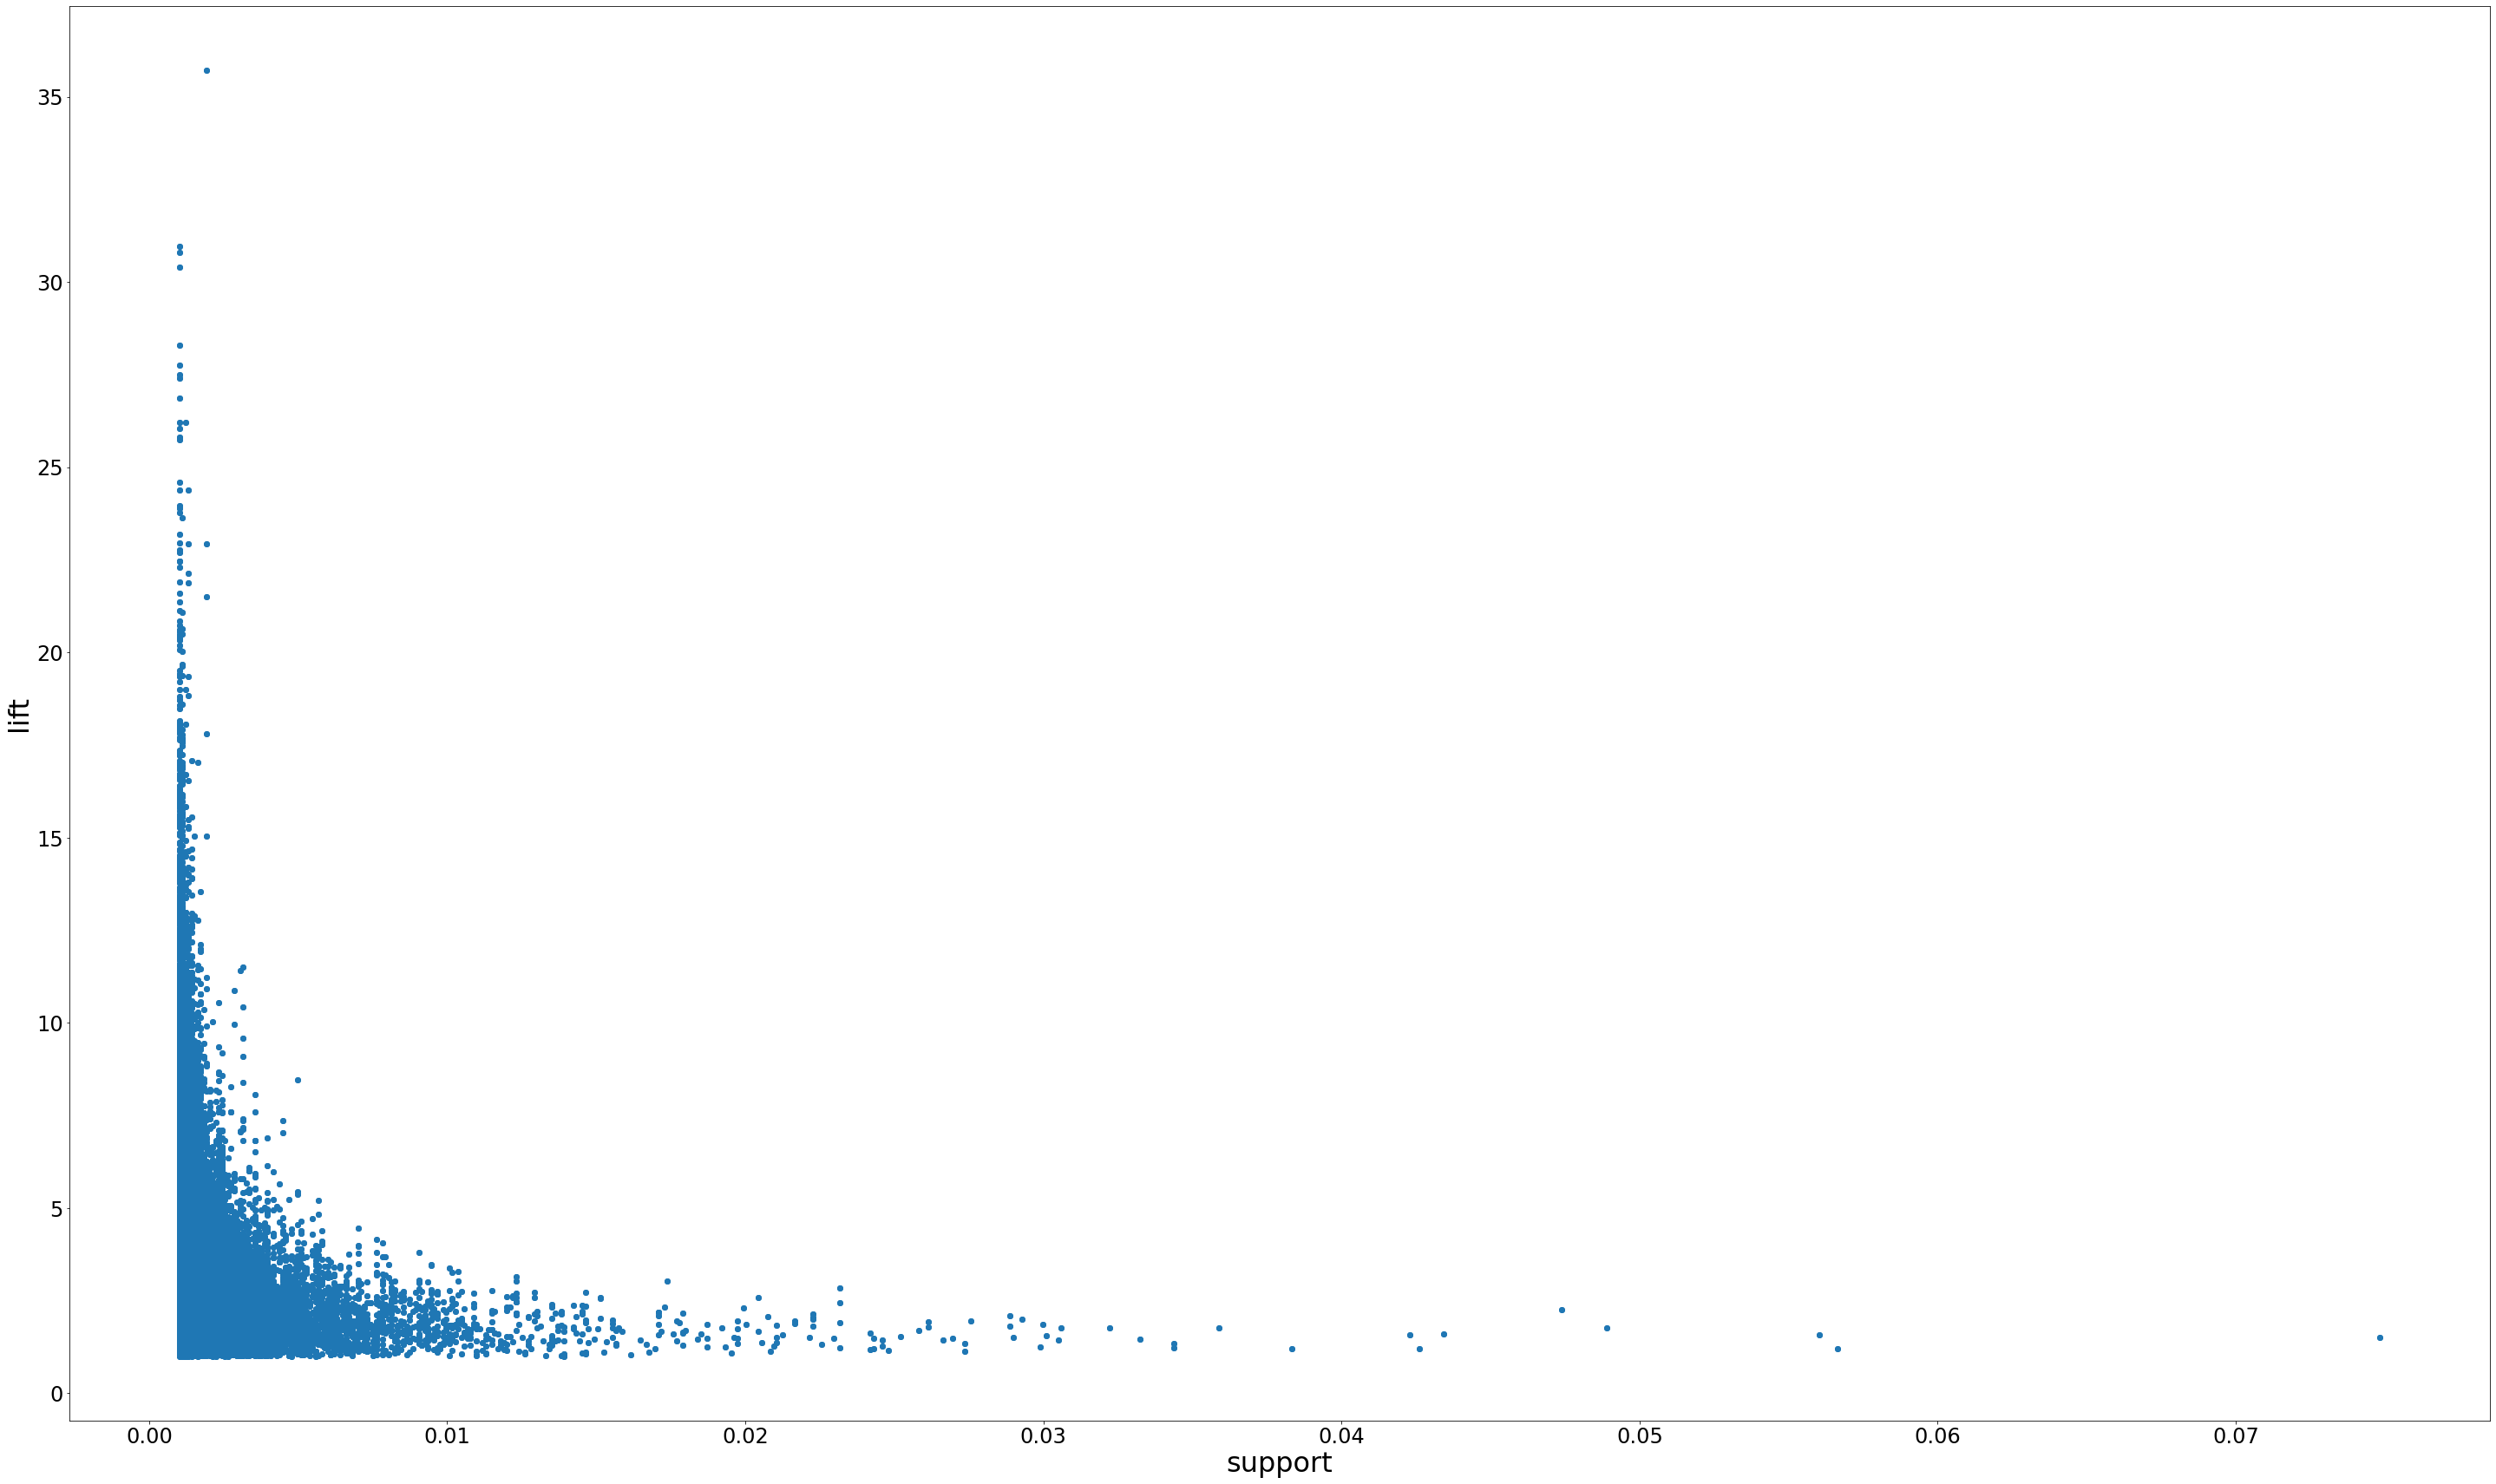

In [88]:
plt.figure(figsize=(50, 30))
plt.scatter(rules["support"], rules["lift"])
plt.xlabel("support")
plt.ylabel("lift")

Text(0, 0.5, 'lift')

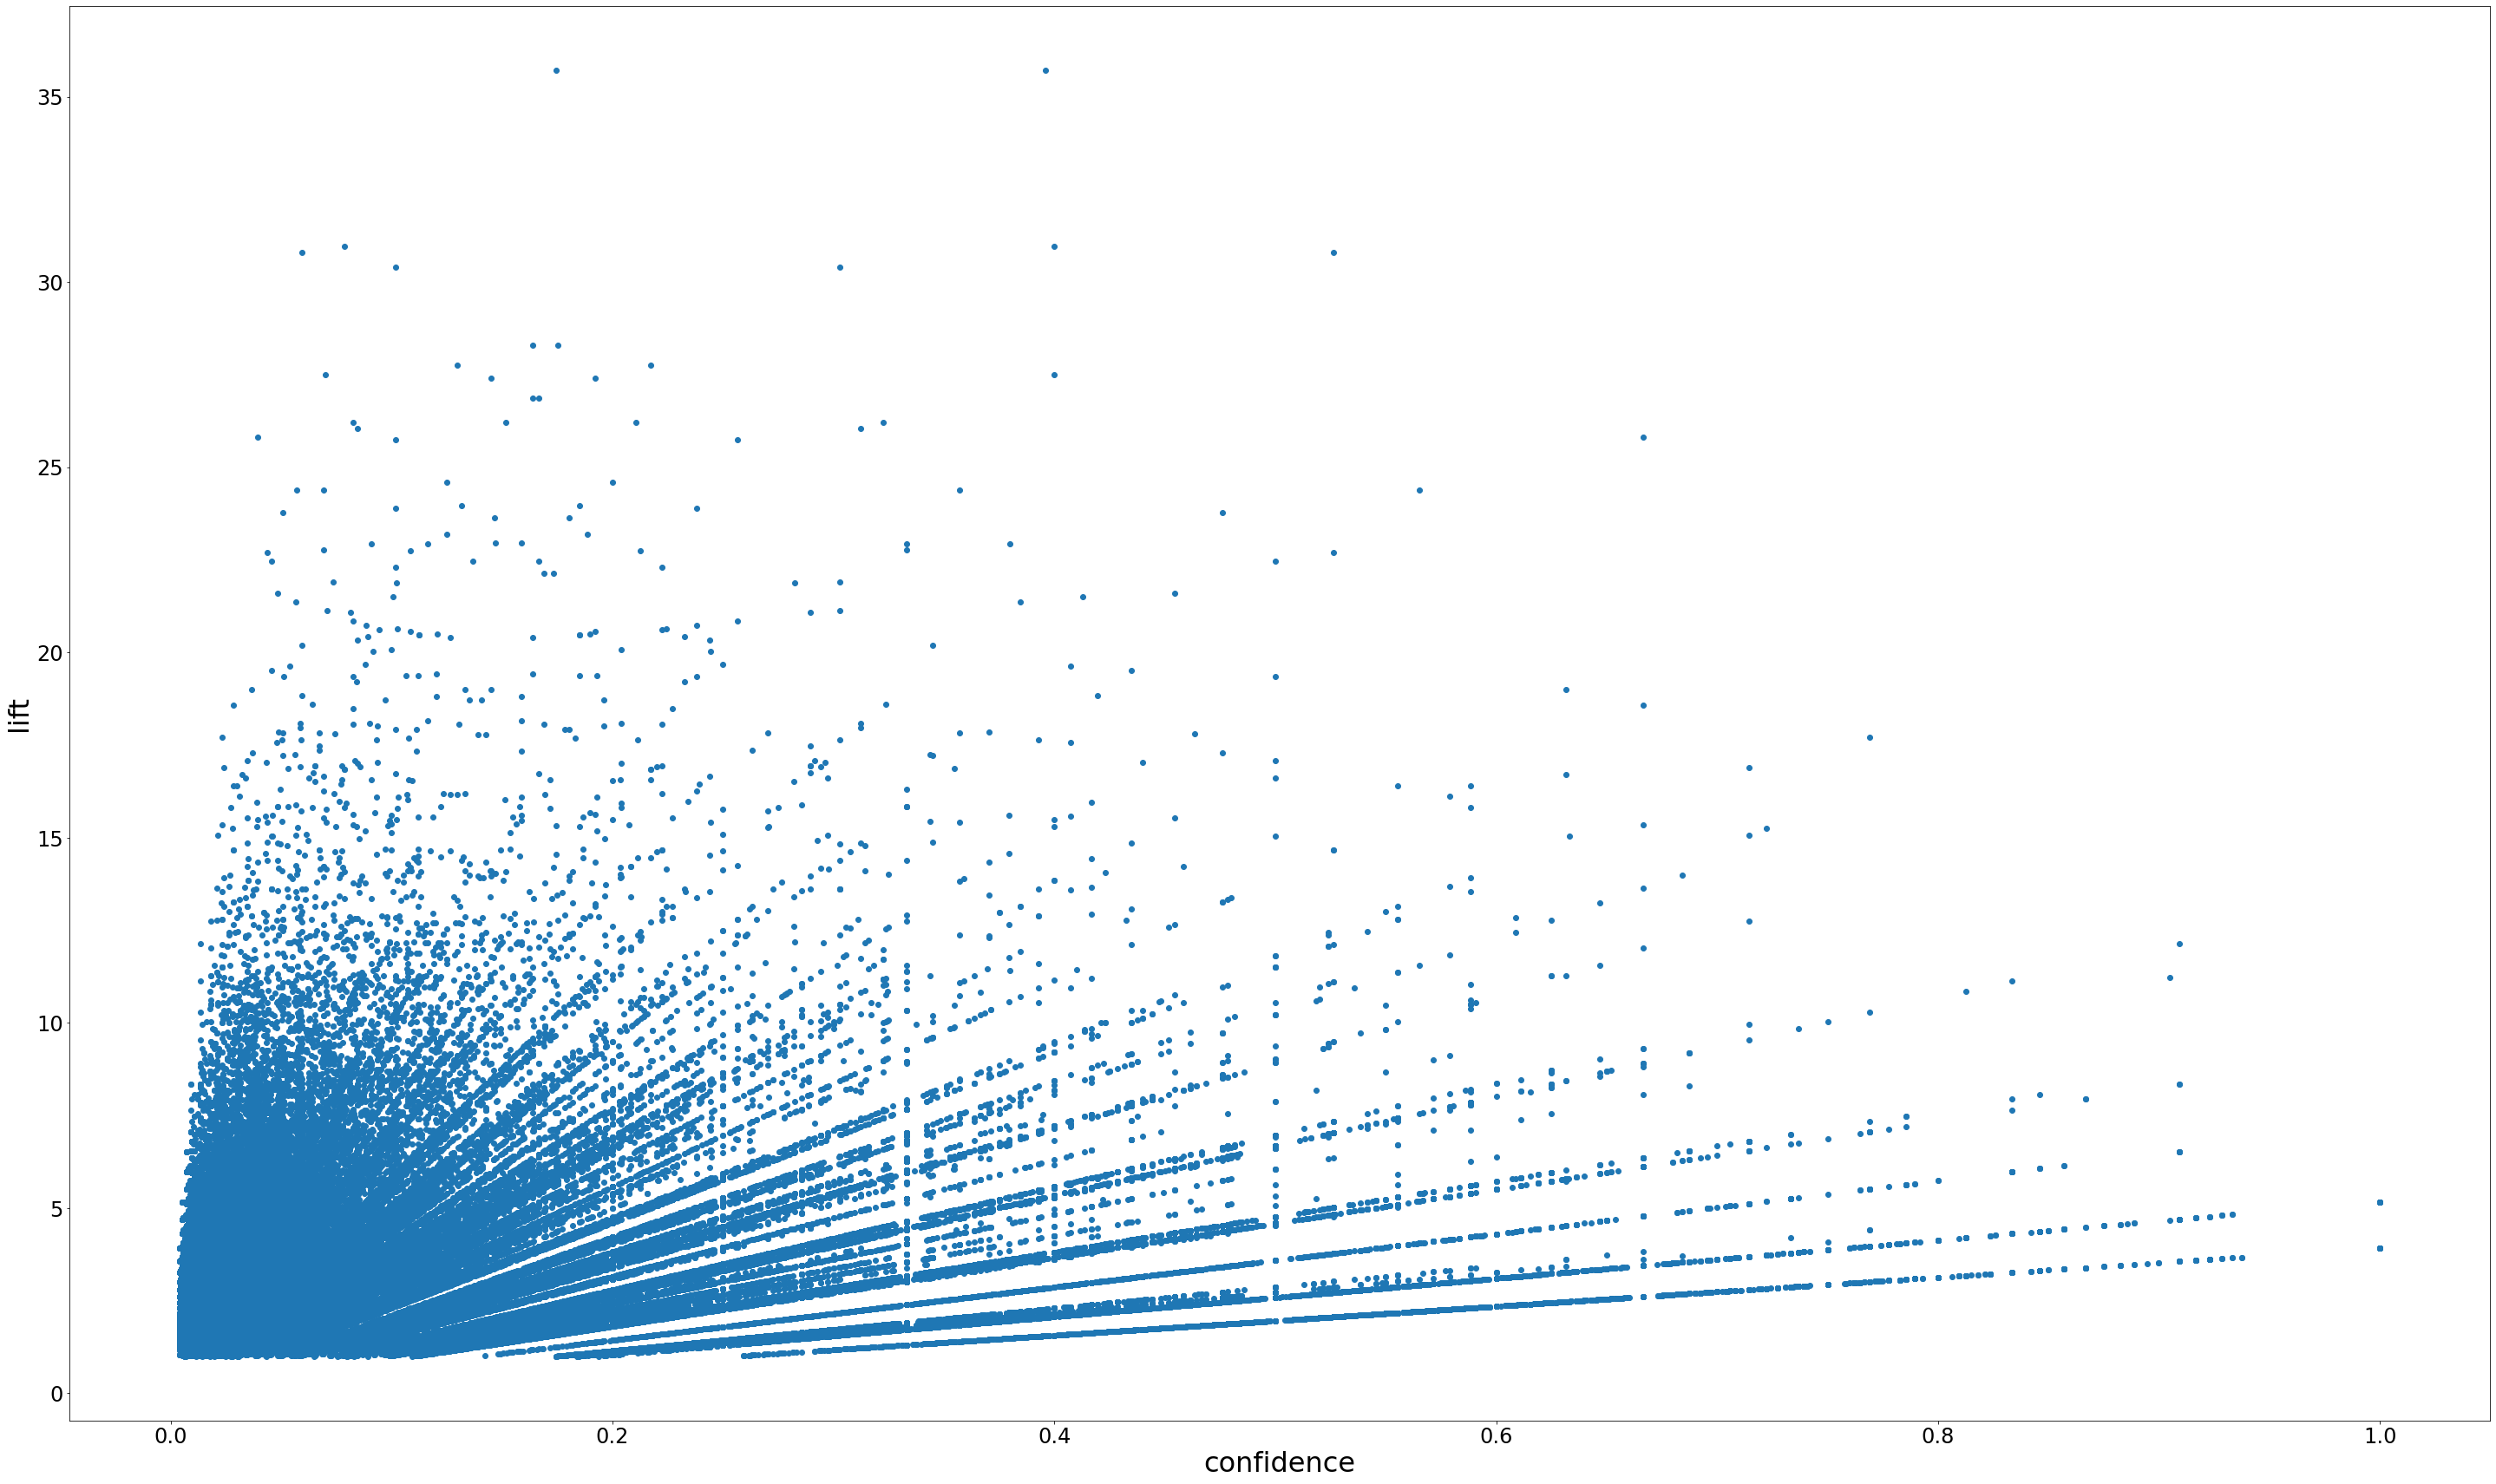

In [89]:
plt.figure(figsize=(50, 30))
plt.scatter(rules["confidence"],rules["lift"])
plt.xlabel("confidence")
plt.ylabel("lift")

In [90]:
top5_rules["antecedents"] = top5_rules["antecedents"].apply(lambda x: ', '.join(list(x))).astype("unicode")
top5_rules["consequents"] = top5_rules["consequents"].apply(lambda x: ', '.join(list(x))).astype("unicode")
top5_rules = top5_rules.assign(antecedents=top5_rules['antecedents'].str.split(',')).explode('antecedents')
top5_rules = top5_rules.assign(consequents=top5_rules['consequents'].str.split(',')).explode('consequents')
top5_rules = top5_rules.reset_index().drop(["index"], axis=1)

{' butter': Text(0.13154257149803467, -0.14885062688833703, ' butter'),
 ' domestic eggs': Text(0.06643629170028714, -0.2943445544127926, ' domestic eggs'),
 ' oil': Text(0.22763094535423323, 0.14356002658316844, ' oil'),
 ' other vegetables': Text(0.2763511764762676, -0.14044479807905863, ' other vegetables'),
 ' red/blush wine': Text(-0.8652010466343504, 0.12633776946483843, ' red/blush wine'),
 ' root vegetables': Text(0.3965586349689965, 0.01619058796069215, ' root vegetables'),
 ' tropical fruit': Text(0.29172797409390405, 0.036645561894357234, ' tropical fruit'),
 ' whole milk': Text(0.20639223604685095, -0.03633165381502533, ' whole milk'),
 'bottled beer': Text(-1.0, 0.3407877150031057, 'bottled beer'),
 'liquor': Text(-0.983473550745724, 0.21452151123099109, 'liquor'),
 'oil': Text(0.42480444527137073, -0.11864323897314971, 'oil'),
 'other vegetables': Text(0.3553850775480894, 0.12805730886525174, 'other vegetables'),
 'tropical fruit': Text(0.19004771949207253, -0.20573986740

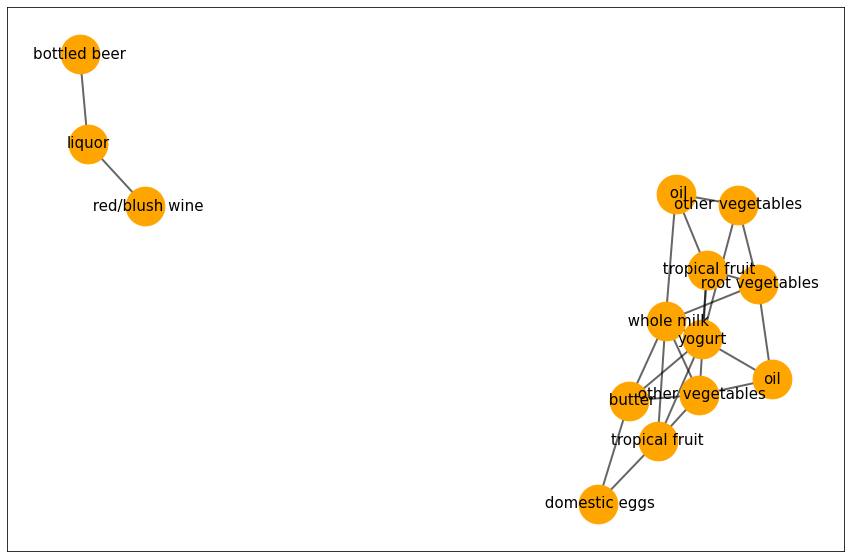

In [98]:
fig, ax=plt.subplots(figsize=(15,10))
GA=nx.from_pandas_edgelist(top5_rules,source='antecedents',target='consequents')
pos = nx.spring_layout(GA)
nx.draw_networkx_nodes(GA, pos, node_size = 1500, node_color = "orange")
nx.draw_networkx_edges(GA, pos, width = 2, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(GA, pos, font_size = 15, font_family = 'sans-serif')